In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mlp import MLP
from var import Var

In this notebook we are going to train a binary classifier using `Var` and `MLP` types. 20 2D points are randomly generated and classified as `red` or -1 and `blue` or 1.   

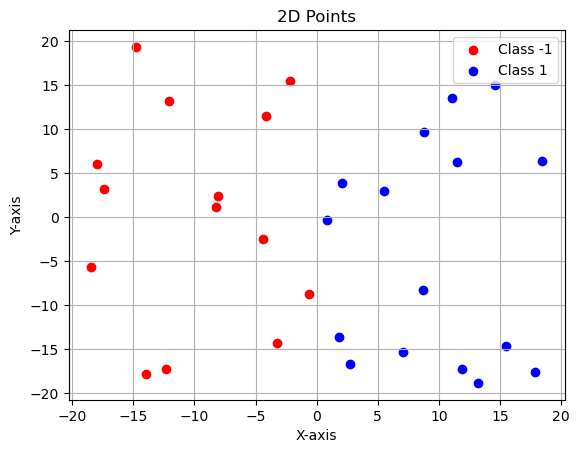

In [8]:
np.random.seed(17)
points = np.random.uniform(-20, 20, (30, 2))
labels = [1 if points[i, 0] > 0 else -1 for i in range(len(points))]
colors = {-1: "red", 1:"blue"}
for class_label in np.unique(labels):
    points_to_plot = points[labels == class_label]
    plt.scatter(points_to_plot[:, 0], points_to_plot[:, 1], color=colors[class_label], label=f'Class {class_label}')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Points')
plt.legend()
plt.grid(True)


To train the classifier a loss function `L` is defined. The loss of the model is calculated and back-propagated in the model to update its weights.   

In [9]:
# Loss function
def loss(X, Y, model):
    res = Var(0.0, "loss")
    for i in range(len(X)):
        y_pred = model(X[i])
        for j in range (len(y_pred)):
            res += (y_pred[j] - Y[i][j])**2
    return res

# Training function
def training(X, Y, model, learning_rate=0.01, steps=100):
    for s in range(steps):
        l = loss(X, Y, model)
        l.backward()
        W = model.weights()
        for w in W:
            # Update the weight using gradient descent
            w.data -= learning_rate*w.grad
            # Set the gradient to zero for the next run
            w.grad = 0.0
        print(f"loss {s}: {l.data} ") 
            

A multi layer perceptron consisting of four layer (first layer: 2x4, second layer: 4x4, third layer:4x2, and forth: 2x1) is defined and trained to be a binary classifier.

In [13]:
# Define a multi layer perceptron (neural model)
nn = MLP([2,4,4,2,1])

# Prepare data for passing in the training function
data_points = [list(point) for point in points]
class_labels = [[label] for label in labels]

# Train the model to be a binary classifier
training(data_points, class_labels, nn)


loss 0: 37.81278503753006 
loss 1: 28.381559256319385 
loss 2: 20.106577862778092 
loss 3: 13.55429416670402 
loss 4: 9.475867006848338 
loss 5: 6.990084293604528 
loss 6: 4.990905063959863 
loss 7: 3.5449478829970276 
loss 8: 2.5553294212796134 
loss 9: 1.8253710915347983 
loss 10: 1.357086557102184 
loss 11: 1.0607904335918052 
loss 12: 0.8423105131234206 
loss 13: 0.7050299189695296 
loss 14: 0.6084341084260787 
loss 15: 0.5170100686077611 
loss 16: 0.46173190364328653 
loss 17: 0.410081421448316 
loss 18: 0.3678361864722345 
loss 19: 0.33427829531139125 
loss 20: 0.30764760904107785 
loss 21: 0.2838025121315187 
loss 22: 0.264232651117125 
loss 23: 0.2480760382278938 
loss 24: 0.23277962399435717 
loss 25: 0.2180125621079265 
loss 26: 0.2059957929881799 
loss 27: 0.19540792839655402 
loss 28: 0.18576713718859578 
loss 29: 0.17608480536284074 
loss 30: 0.16809949586314224 
loss 31: 0.16025327553829763 
loss 32: 0.15375597914781805 
loss 33: 0.14704031065362014 
loss 34: 0.1408682057

Now lets generate random points and predict the corresponding class labels by our binary classifier

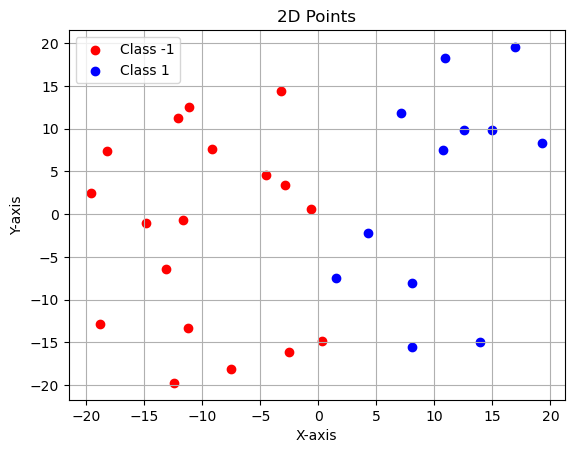

In [27]:
np.random.seed(22)
points = np.random.uniform(-20, 20, (30, 2))
labels = [nn(list(points[i]))[0].data for i in range(len(points))]
labels = [-1 if label < 0 else 1 for label in labels]
colors = {-1: "red", 1:"blue"}
for class_label in np.unique(labels):
    points_to_plot = points[labels == class_label]
    plt.scatter(points_to_plot[:, 0], points_to_plot[:, 1], color=colors[class_label], label=f'Class {class_label}')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Points')
plt.legend()
plt.grid(True)

As we can see only one point at the coordinate (0.1, -15) is wrongly classified but all other points are classified correctly, which is not too bad.  